In [111]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
data = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')
dfnm = data.select_dtypes(include='number')
dfca = data.select_dtypes(include='object')
dfnm

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


 1. check if there are highly correlated features and drop them if there are any.

In [112]:
cor = dfnm.corr().abs() # finding the correlation matrix
cor_UT = cor.where(np.triu(np.ones(cor.shape),k=1).astype(np.bool_)) # finding the upper triangular part in the correlation matrix (could also use lower triangular)
to_drop = [column for column in cor_UT.columns if any(cor_UT[column] > 0.95)] # setting the threshold as 0.95
# to_drop is empty with 0.95 correlation threshold. So, nothing to drop
to_drop

[]

2. One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 3. ( Hint: check Dropfirst option).

In [113]:
dfca['education'].unique()
dfca

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [137]:
## For categorical columns with more than two answers

# Create a dictionary that maps each unique educational level to an integer
ed_map = {"high school or below": 0, "college": 1, "bachelor": 1,"master": 2, "doctor":3}
# Replace the values in the "education" column with their mapped integers
dfca['education_num'] = dfca['education'].map(ed_map) # e.g., for the key value 'college' in the column 'education', the map function maps '1' to the corresponding new column  'education_num'

# For 'coverage'
cov_map = {"basic": 0, "extended": 1, "premium":2}
dfca['coverage_num'] = dfca['coverage'].map(cov_map)

# For 'employment_status'
dfca['employment_status'].unique()
em_map = {"employed": 0, "unemployed": 1, "medical leave":2, "disabled":3, "retired":4}
dfca['employment_statnum'] = dfca['employment_status'].map(em_map)

# For 'region'
dfca['region'].unique()
region_map = {'central': 0, 'west region':1, 'east':2, 'north west':3}
dfca['region_num'] = dfca['region'].map(region_map)

# For 'month'
dfca['month'].unique()
month_map = {'jan': 0, 'feb':1}
dfca['month_num'] = dfca['month'].map(month_map)

# For 'location_code'
dfca['location_code'].unique()
loc_map = {'suburban':0, 'urban':1, 'rural':2}
dfca['location_num'] = dfca['location_code'].map(loc_map)

# For 'renew_offer_type'
dfca['renew_offer_type'].unique()
offer_map = {'offer1': 0, 'offer2':1, 'offer3':3, 'offer4':3}
dfca['renew_offer_num'] = dfca['renew_offer_type'].map(offer_map)

# For 'sales_channel'
dfca['sales_channel'].unique()
sales_map = {'agent':0, 'call center':1, 'branch':2, 'web':3}
dfca['sales_channel_num'] = dfca['sales_channel'].map(sales_map)

# For 'vehicle_class'
dfca['vehicle_class'].unique()
veh_map = {'four-door car':0, 'suv':1, 'two-door car':2, 'sports car':3, 'luxury car':4, 'luxury suv':5}
dfca['vehicle_class_num'] = dfca['vehicle_class'].map(veh_map)

# For 'vehicle_size'
dfca['vehicle_size'].unique()
veh_size_map = {'medsize':0, 'small':1, 'large':2}
dfca['vehicle_size_num'] = dfca['vehicle_size'].map(veh_size_map)




,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,...,education_num,coverage_num,employment_statnum,region_num,month_num,location_num,renew_offer_num,sales_channel_num,vehicle_class_num,vehicle_size_num
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,...,1,0,0,0,1,0,3,0,0,0
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,...,1,0,1,1,0,0,3,1,0,0
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,...,1,0,0,2,1,0,3,1,1,0
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,...,1,1,0,3,0,0,1,2,0,0
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,...,1,2,2,3,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,...,1,2,1,0,0,0,3,3,4,0
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,...,1,0,0,3,0,1,1,2,0,0
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,...,1,1,0,0,1,2,0,3,5,0
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,...,1,2,0,1,1,1,0,2,1,0



Optional task

Begin by visually examining distributions (histograms) of the numerical features. Select a variable, call it varA, which takes on a wide range of numerical values, and another, varB, which has noticeably large skew (slanted with respect to the mean). For example, you might select customer_lifetime_value as a candidate varB which has skew.

varA

Use minmax transform to bring varA's values into the range [0,1].

Check that varA has been rescaled using a distplot or a histagram

C:\Users\ajayk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

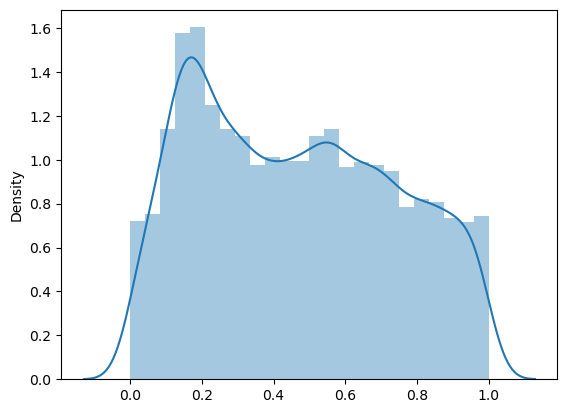

In [170]:
from sklearn.preprocessing import MinMaxScaler
varA = dfnm[["income"]] ### double bracket bro!!!! that was the trick!
scaler = MinMaxScaler()
scaled = scaler.fit_transform(varA)

import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(scaled)

varB

Use StandardScalar or PowerTransform to reduce the skew and standardize varB's distribution.

Check that the result has zero mean, unit variance, and reduced skew using mean(), std(), and a plot of the PDF.

C:\Users\ajayk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

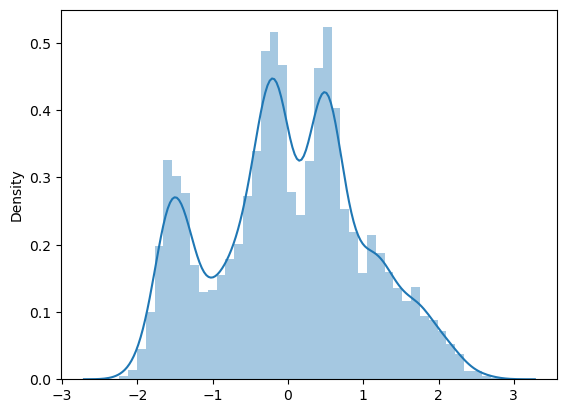

In [177]:
from sklearn.preprocessing import power_transform
varB = dfnm[["customer_lifetime_value"]] ### double bracket bro!!!! that was the trick!
power_transformed = power_transform(varB, method='box-cox')
sns.distplot(power_transformed)